In [1]:
#pyTorch

import azureml.core
print(azureml.core.VERSION)
from azureml.core.workspace import Workspace
ws = Workspace.from_config()
ws.get_details()

from azureml.core import Environment

curated_env = Environment.get(workspace=ws, name="abi_pytorch2")



1.51.0


In [4]:
%pip install torch


Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement rTorch (from versions: none)
ERROR: No matching distribution found for rTorch
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy
import pandas
import matplotlib.pyplot
import csv
import torch
import math
import torch.nn as nn

Load data, make into tensors...

In [3]:
schools = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_school_count_data.csv")

schools = schools.iloc[:, 3:]

schools = schools.dropna()
schools = schools[schools.NUMPOINTS > 0]

schools.head()

,NUMPOINTS,ID,land,pop,built_s,built_v,smod,x,y
146,2,147.0,611278.0,0.000000,0,0,11,-4.137907e+06,-363209.718402
199,2,200.0,962773.0,478.437707,39625,99074,12,-4.137370e+06,-391241.256537
200,2,201.0,975786.0,274.190113,22120,55308,12,-4.137350e+06,-392238.102079
323,4,324.0,993597.0,1056.169779,97516,243807,13,-4.136370e+06,-441241.256537
331,2,332.0,1000000.0,187.361269,22986,57475,12,-4.136370e+06,-449241.256537


In [4]:
schools.NUMPOINTS.describe()

count    4731.000000
mean        3.036356
std         5.176254
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       198.000000
Name: NUMPOINTS, dtype: float64

In [5]:
mu_ = schools.NUMPOINTS.mean()
sigma_ = numpy.sqrt(schools.NUMPOINTS.var())

https://github.com/meaneych/PyTorch_CountDistribution_Examples/blob/main/Poisson_PyTorch_Autograd.ipynb

In [6]:
x = torch.autograd.Variable(torch.from_numpy(schools.to_numpy())).type(torch.FloatTensor)
l_mu = torch.autograd.Variable(torch.rand(1), requires_grad=True) 

Poisson Loss Functions

In [9]:
def poisson_nll(x, log_mu):
    nll = -torch.sum(-torch.exp(log_mu) + x*torch.log(torch.exp(log_mu)) - torch.lgamma(x))
    return nll

In [10]:
## Learning rate
learning_rate = 2e-4

## Training loop
for t in range(100):
    ## Backprop on negative log likelihood loss
    loss = nn.PoissonNLLLoss()
    NLLp = loss(l_mu, x)
    NLLp.backward()
    ## Logging to console
    if t % 10 == 0:
        print("Iteration = ", t, 
              "loglik  =", NLLp.data.numpy(), 
              "l_mu =", l_mu.data.numpy(), 
              "dL/dlmu = ", l_mu.grad.data.numpy())
    ## SGD update of parms
    l_mu.data -= learning_rate * l_mu.grad.data
    ## Zero the gradients
    l_mu.grad.data.zero_()

Iteration =  0 loglik  = -2199200300.0 l_mu = [-6631.6416] dL/dlmu =  [331622.3]
Iteration =  10 loglik  = -2419146000.0 l_mu = [-7294.884] dL/dlmu =  [331622.3]
Iteration =  20 loglik  = -2639092000.0 l_mu = [-7958.126] dL/dlmu =  [331622.3]
Iteration =  30 loglik  = -2859038200.0 l_mu = [-8621.368] dL/dlmu =  [331622.3]
Iteration =  40 loglik  = -3078984200.0 l_mu = [-9284.61] dL/dlmu =  [331622.3]
Iteration =  50 loglik  = -3298930200.0 l_mu = [-9947.853] dL/dlmu =  [331622.3]
Iteration =  60 loglik  = -3518875100.0 l_mu = [-10611.095] dL/dlmu =  [331622.3]
Iteration =  70 loglik  = -3738821000.0 l_mu = [-11274.337] dL/dlmu =  [331622.3]
Iteration =  80 loglik  = -3958767400.0 l_mu = [-11937.579] dL/dlmu =  [331622.3]
Iteration =  90 loglik  = -4178713000.0 l_mu = [-12600.821] dL/dlmu =  [331622.3]


In [11]:
## Final estimate of Poisson mean parm
[l_mu.data.numpy(), numpy.exp(l_mu.data.numpy())]

[array([-13264.063], dtype=float32), array([0.], dtype=float32)]

Now let's try with just urban maybe?

(array([474.,  12.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  20.7,  40.4,  60.1,  79.8,  99.5, 119.2, 138.9, 158.6,
        178.3, 198. ]),
 <a list of 10 Patch objects>)

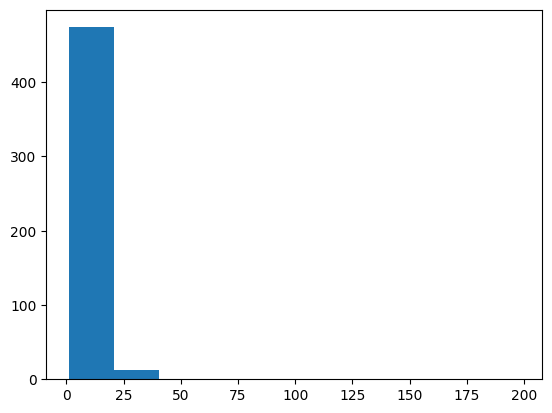

In [13]:
schools = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_school_count_data.csv")
schools = schools.iloc[:, 3:]
schools = schools.dropna()
#schools = schools[schools["smod"].isin([21,22,23,30])]
schools = schools[schools["smod"] == 30]
schools = schools[schools.NUMPOINTS > 0]

schools.head()
matplotlib.pyplot.hist(schools.NUMPOINTS)

In [14]:
mu_ = schools.NUMPOINTS.mean()
sigma_ = numpy.sqrt(schools.NUMPOINTS.var())

x = torch.autograd.Variable(torch.from_numpy(schools.to_numpy())).type(torch.FloatTensor)
l_mu = torch.autograd.Variable(torch.rand(1), requires_grad=True) 

## Learning rate
learning_rate = 2e-4

## Training loop
for t in range(100):
    ## Backprop on negative log likelihood loss
    loss = nn.PoissonNLLLoss()
    NLLp = loss(l_mu, x)
    NLLp.backward()
    ## Logging to console
    if t % 10 == 0:
        print("Iteration = ", t, 
              "loglik  =", NLLp.data.numpy(), 
              "l_mu =", l_mu.data.numpy(), 
              "dL/dlmu = ", l_mu.grad.data.numpy())
    ## SGD update of parms
    l_mu.data -= learning_rate * l_mu.grad.data
    ## Zero the gradients
    l_mu.grad.data.zero_()

Iteration =  0 loglik  = 56152.69 l_mu = [0.8649193] dL/dlmu =  [64922.113]
Iteration =  10 loglik  = -8373024.0 l_mu = [-128.97504] dL/dlmu =  [64919.74]
Iteration =  20 loglik  = -16802172.0 l_mu = [-258.8145] dL/dlmu =  [64919.74]
Iteration =  30 loglik  = -25231326.0 l_mu = [-388.654] dL/dlmu =  [64919.74]
Iteration =  40 loglik  = -33660460.0 l_mu = [-518.49347] dL/dlmu =  [64919.74]
Iteration =  50 loglik  = -42089630.0 l_mu = [-648.33295] dL/dlmu =  [64919.74]
Iteration =  60 loglik  = -50518780.0 l_mu = [-778.1724] dL/dlmu =  [64919.74]
Iteration =  70 loglik  = -58947910.0 l_mu = [-908.0119] dL/dlmu =  [64919.74]
Iteration =  80 loglik  = -67377030.0 l_mu = [-1037.8513] dL/dlmu =  [64919.74]
Iteration =  90 loglik  = -75806136.0 l_mu = [-1167.6902] dL/dlmu =  [64919.74]


In [15]:
## Final estimate of Poisson mean parm
[l_mu.data.numpy(), numpy.exp(l_mu.data.numpy())]

[array([-1297.529], dtype=float32), array([0.], dtype=float32)]

0-1 Classification

In [35]:
schools = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_school_count_data.csv")

schools = schools.iloc[:, 3:]

schools = schools.dropna()

schools['ind'] = (schools["NUMPOINTS"] > 0)

schools.head()

schools['ind'] = numpy.multiply(schools['ind'], 1)

schools.head()

,NUMPOINTS,ID,land,pop,built_s,built_v,smod,x,y,ind
0,0,1.0,1000000.0,0.000000,0,0,11,-4.146928e+06,-415647.743962,0
1,0,2.0,1000000.0,0.000000,0,0,11,-4.146995e+06,-416168.514849,0
2,0,3.0,1000000.0,89.137142,4644,11618,12,-4.145898e+06,-412699.018444,0
3,0,4.0,1000000.0,8.601842,359,898,11,-4.146006e+06,-413307.519153,0
4,0,5.0,1000000.0,2.825484,141,353,11,-4.146103e+06,-414290.948276,0


In [38]:
mu_ = schools.ind.mean()
sigma_ = numpy.sqrt(schools.ind.var())

x = torch.autograd.Variable(torch.from_numpy(schools.to_numpy())).type(torch.FloatTensor)
l_mu = torch.autograd.Variable(torch.rand(1), requires_grad=True) 


## Learning rate
learning_rate = 2e-4

## Training loop
for t in range(100):
    ## Backprop on negative log likelihood loss
    loss = nn.CrossEntropyLoss()
    NLLp = loss(l_mu, x)
    NLLp.backward()
    ## Logging to console
    if t % 10 == 0:
        print("Iteration = ", t, 
              "loglik  =", NLLp.data.numpy(), 
              "l_mu =", l_mu.data.numpy(), 
              "dL/dlmu = ", l_mu.grad.data.numpy())
    ## SGD update of parms
    l_mu.data -= learning_rate * l_mu.grad.data
    ## Zero the gradients
    l_mu.grad.data.zero_()

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

Add other variables 

y ~ b0 + b1* land + b2*pop + b3*built_s + b4*built_v

In [70]:
schools = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_school_count_data.csv")

schools = schools.iloc[:, 3:]

schools = schools.dropna()
schools.rename(columns = {"pop" : "population"}, inplace = True)

schools.head()

,NUMPOINTS,ID,land,population,built_s,built_v,smod,x,y
0,0,1.0,1000000.0,0.000000,0,0,11,-4.146928e+06,-415647.743962
1,0,2.0,1000000.0,0.000000,0,0,11,-4.146995e+06,-416168.514849
2,0,3.0,1000000.0,89.137142,4644,11618,12,-4.145898e+06,-412699.018444
3,0,4.0,1000000.0,8.601842,359,898,11,-4.146006e+06,-413307.519153
4,0,5.0,1000000.0,2.825484,141,353,11,-4.146103e+06,-414290.948276


In [71]:
x1 = torch.autograd.Variable(torch.from_numpy(schools.land.to_numpy())).type(torch.FloatTensor)
x2 = torch.autograd.Variable(torch.from_numpy(schools.population.to_numpy())).type(torch.FloatTensor)
x3 = torch.autograd.Variable(torch.from_numpy(schools.built_s.to_numpy())).type(torch.FloatTensor)
x4 = torch.autograd.Variable(torch.from_numpy(schools.built_v.to_numpy())).type(torch.FloatTensor)

y = torch.autograd.Variable(torch.from_numpy(schools.NUMPOINTS.to_numpy())).type(torch.FloatTensor)

b0 = torch.autograd.Variable(torch.rand(1), requires_grad=True) 
b1 = torch.autograd.Variable(torch.rand(1), requires_grad=True) 
b2 = torch.autograd.Variable(torch.rand(1), requires_grad=True) 
b3 = torch.autograd.Variable(torch.rand(1), requires_grad=True) 
b4 = torch.autograd.Variable(torch.rand(1), requires_grad=True) 

In [68]:
def poisson_nll(x1, x2, x3, x4, y, b0, b1, b2, b3, b4):
    nll = -torch.sum(-torch.exp(b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4) + y*torch.log(torch.exp(b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4)) - torch.lgamma(y))
    return nll

In [69]:
## Learning rate
learning_rate_b0 = 2e-4
learning_rate_b1 = 2e-4
learning_rate_b2 = 2e-4
learning_rate_b3 = 2e-4
learning_rate_b4 = 2e-4


## Training loop
for t in range(200):
    ## Backprop on negative log likelihood loss
    NLLp = poisson_nll(x1=x1, x2=x2, x3=x3, x4=x4, y=y, b0=b0, b1=b1, b2=b2, b3=b3, b4=b4)
    NLLp.backward()
    ## Logging to console
    if t % 10 == 0:
        print("Iteration = ", t, 
              "loglik  =", NLLp.data.numpy(), 
              "b0 =", b0.data.numpy(), 
              "b1 =", b1.data.numpy(),
              "b2 =", b2.data.numpy(), 
              "b3 =", b3.data.numpy(), 
              "b4 =", b4.data.numpy(), 
              "dL/db0 = ", b0.grad.data.numpy(),
              "dL/db1 = ", b1.grad.data.numpy(),
              "dL/db2 = ", b2.grad.data.numpy(),
              "dL/db3 = ", b3.grad.data.numpy(),
              "dL/db4 = ", b4.grad.data.numpy()
             )
    ## SGD update of parms
    b0.data -= learning_rate_b0 * b0.grad.data
    b1.data -= learning_rate_b1 * b1.grad.data
    b2.data -= learning_rate_b2 * b2.grad.data
    b3.data -= learning_rate_b3 * b3.grad.data
    b4.data -= learning_rate_b4 * b4.grad.data
    ## Zero the gradients
    b0.grad.data.zero_()
    b1.grad.data.zero_()
    b2.grad.data.zero_()
    b3.grad.data.zero_()
    b4.grad.data.zero_()

Iteration =  0 loglik  = nan b0 = [0.49486542] b1 = [0.2714638] b2 = [0.981452] b3 = [0.69298154] b4 = [0.03178596] dL/db0 =  [nan] dL/db1 =  [nan] dL/db2 =  [nan] dL/db3 =  [nan] dL/db4 =  [nan]
Iteration =  10 loglik  = nan b0 = [nan] b1 = [nan] b2 = [nan] b3 = [nan] b4 = [nan] dL/db0 =  [nan] dL/db1 =  [nan] dL/db2 =  [nan] dL/db3 =  [nan] dL/db4 =  [nan]
Iteration =  20 loglik  = nan b0 = [nan] b1 = [nan] b2 = [nan] b3 = [nan] b4 = [nan] dL/db0 =  [nan] dL/db1 =  [nan] dL/db2 =  [nan] dL/db3 =  [nan] dL/db4 =  [nan]
Iteration =  30 loglik  = nan b0 = [nan] b1 = [nan] b2 = [nan] b3 = [nan] b4 = [nan] dL/db0 =  [nan] dL/db1 =  [nan] dL/db2 =  [nan] dL/db3 =  [nan] dL/db4 =  [nan]
Iteration =  40 loglik  = nan b0 = [nan] b1 = [nan] b2 = [nan] b3 = [nan] b4 = [nan] dL/db0 =  [nan] dL/db1 =  [nan] dL/db2 =  [nan] dL/db3 =  [nan] dL/db4 =  [nan]
Iteration =  50 loglik  = nan b0 = [nan] b1 = [nan] b2 = [nan] b3 = [nan] b4 = [nan] dL/db0 =  [nan] dL/db1 =  [nan] dL/db2 =  [nan] dL/db3 =  [

In [73]:
def poissonLoss(x2, y, b0, b2):
    nll = torch.mean(torch.exp(b0 + b2*x2) - y*(b0 + b2*x2))
    return nll

## Learning rate
learning_rate_b0 = 2e-4
learning_rate_b2 = 2e-4



## Training loop
for t in range(200):
    ## Backprop on negative log likelihood loss
    NLLp = poissonLoss(x2=x2, y=y, b0=b0, b2=b2)
    NLLp.backward()
    ## Logging to console
    if t % 10 == 0:
        print("Iteration = ", t, 
              "loglik  =", NLLp.data.numpy(), 
              "b0 =", b0.data.numpy(), 
              "b2 =", b2.data.numpy(), 
              "dL/db0 = ", b0.grad.data.numpy(),
              "dL/db2 = ", b2.grad.data.numpy()
             )
    ## SGD update of parms
    b0.data -= learning_rate_b0 * b0.grad.data
    b2.data -= learning_rate_b2 * b2.grad.data
 
    ## Zero the gradients
    b0.grad.data.zero_()
    b2.grad.data.zero_()


Iteration =  0 loglik  = inf b0 = [0.40776038] b2 = [0.18912697] dL/db0 =  [inf] dL/db2 =  [inf]
Iteration =  10 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  20 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  30 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  40 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  50 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  60 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  70 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  80 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  90 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  100 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 =  [nan] dL/db2 =  [nan]
Iteration =  110 loglik  = nan b0 = [nan] b2 = [nan] dL/db0 = 

In [75]:
[b0.data.numpy(), b2.data.numpy(), ]

[array([nan], dtype=float32), array([nan], dtype=float32)]